# Regesi menggunakan Regresi Linier

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 5 - Exploratory Data Analysis.**

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Ingestion

In [2]:
# Membaca data dari file CSV
df = pd.read_csv(r'../datasets/boston-housing.csv')

In [3]:
# Menampilkan statistik deskriptif dari data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Menampilkan sampel 5 data teratas
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='medv'>

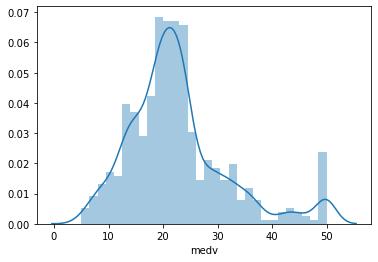

In [5]:
# Distribution plot
sns.distplot(df['medv'], bins=30)

<AxesSubplot:>

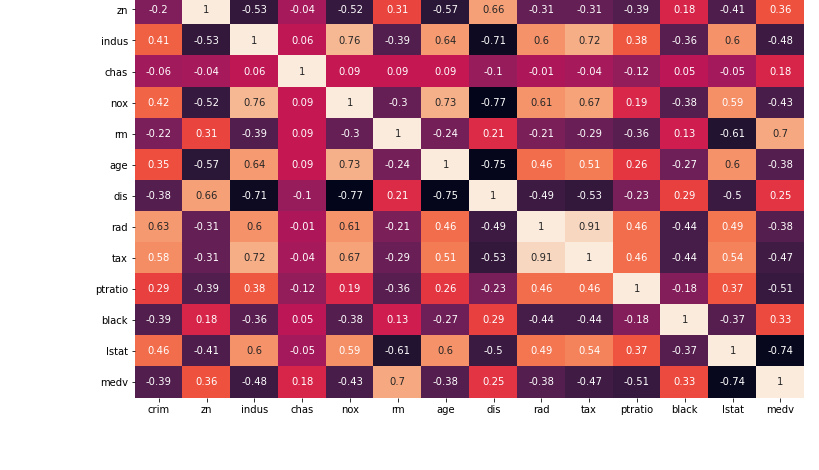

In [6]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Preprocessing

In [7]:
# Memisahkan features dan label
X = df["rm"].values.reshape(-1, 1)
y = df["medv"].values

## Training

In [8]:
# Membuat model dengan data latih
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

## Evaluation

In [9]:
# Melakukan prediksi dan menampilkan statistik
y_pred = regressor.predict(X)

print('Koefisien: ', regressor.coef_)
print('MAE      : {:.2f}'.format(mean_absolute_error(y, y_pred)))
print('MSE      : {:.2f}'.format(mean_squared_error(y, y_pred)))
print('RMSE     : {:.2f}'.format(np.sqrt(mean_squared_error(y, y_pred))))
print('R^2      : {:.2f}'.format(r2_score(y, y_pred)))

Koefisien:  [9.10210898]
MAE      : 4.45
MSE      : 43.60
RMSE     : 6.60
R^2      : 0.48


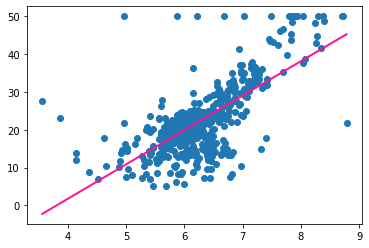

In [10]:
# Membuat plot
pred_space = np.linspace(min(X), max(X)).reshape(-1, 1)
pred = regressor.predict(pred_space)

plt.scatter(X, y)
plt.plot(pred_space, pred, color='deeppink', linewidth=2)

## Prediction

In [14]:
# Melakukan prediksi dari data baru
pred_new = [[8.0]]
regressor.predict(pred_new)

array([38.14625107])

## Persistance

In [12]:
# Simpan model
import joblib
joblib.dump(regressor, "../model/housing.joblib")

['../model/housing.joblib']